In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly 
import plotly.express as px

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

#something learned new from kaggle

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv(r"C:\Users\19193\Documents\BootCamp\Homework\CyrptocurrencyClustering-challenge\heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.duplicated().sum()

0

In [4]:
#drop target 
#rest are going to be train
numeric= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

cat = df.select_dtypes('object').columns

print(f'numeric Columns:  {df[numeric].columns}')
print('\n')
print(f'cat Columns: {df[cat].columns}')

numeric Columns:  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak'], dtype='object')


cat Columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [5]:
df[cat].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [6]:
df[numeric].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000


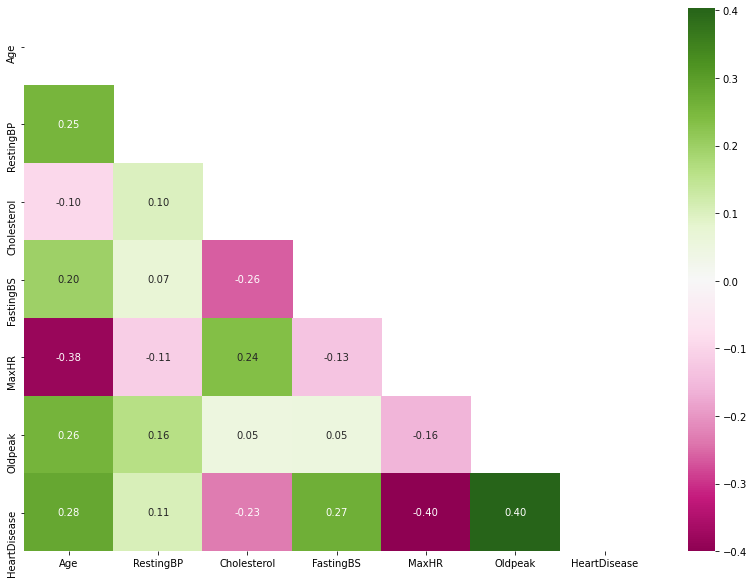

In [7]:

# Calculate correlation between each pair of variable
# Create a dataset
numeric1= df.select_dtypes('number').columns

# Calculate correlation between each pair of variable
matrix = np.triu(df[numeric1].corr())
fig, ax = plt.subplots(figsize=(14,10)) 

# Draw the heatmap with the mask
sns.heatmap (df[numeric1].corr(),   cmap='PiYG',fmt= '.2f',mask=matrix, ax=ax, annot=True);


By above correlation, there is low level correlation between the numeric features and the target variable
-Oldpeak (depression related number) has a positive correlation with the heart disease.
-Maximum heart rate has negative correlation with the heart disease.
-Interestingly cholesterol has negative correlation with the heart disease.

In [8]:
df[cat].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [9]:
def grpby(x):
    z=df.groupby(x)['HeartDisease'].mean().sort_values(ascending=False)
    return z

In [22]:
grpby("Sex")

Sex
M    0.631724
F    0.259067
Name: HeartDisease, dtype: float64

Men are almost 2 and 1/2 times more likely have a heart disease than women.


In [11]:
grpby("ChestPainType")

ChestPainType
ASY    0.790323
TA     0.434783
NAP    0.354680
ATA    0.138728
Name: HeartDisease, dtype: float64

We can observe clear differences among the chest pain type.
-Person with ASY: Asymptomatic chest pain has almost 2 times more likely have a heart disease than person with TA -Typical Angina chest pain.

In [12]:
grpby("RestingECG")

RestingECG
ST        0.657303
LVH       0.563830
Normal    0.516304
Name: HeartDisease, dtype: float64

Here with LVH, Normal- resting ECG results don't have much difference.
But Person with ST: having ST-T wave abnormality is more likely have a heart disease than the others.

In [13]:
grpby('ST_Slope')

ST_Slope
Flat    0.828261
Down    0.777778
Up      0.197468
Name: HeartDisease, dtype: float64

The slope of the peak exercise ST segment has differences.
Up significantly less likely has heart disease than the other two segment.

In [14]:
df.groupby('Oldpeak')['HeartDisease'].mean().sort_values(ascending=False)

Oldpeak
-2.6    1.000000
-2.0    1.000000
 2.1    1.000000
 2.2    1.000000
 2.5    1.000000
 2.8    1.000000
 2.9    1.000000
 3.1    1.000000
 3.2    1.000000
 3.4    1.000000
 3.6    1.000000
 3.7    1.000000
 3.8    1.000000
 4.0    1.000000
 4.4    1.000000
 5.0    1.000000
 5.6    1.000000
 1.7    1.000000
 6.2    1.000000
-1.5    1.000000
-1.0    1.000000
-0.9    1.000000
-0.8    1.000000
-0.7    1.000000
 3.0    0.892857
 2.6    0.857143
 1.8    0.823529
 2.0    0.815789
 1.5    0.792453
 2.4    0.750000
 0.9    0.750000
 1.2    0.730769
 1.1    0.714286
 1.9    0.714286
 1.3    0.714286
 0.7    0.714286
 1.0    0.697674
 1.4    0.666667
 0.5    0.631579
 1.6    0.500000
 4.2    0.500000
 3.5    0.500000
-0.5    0.500000
 0.8    0.500000
 0.1    0.357143
 0.0    0.336957
 0.6    0.285714
 0.3    0.272727
 0.2    0.181818
 0.4    0.181818
-1.1    0.000000
 2.3    0.000000
-0.1    0.000000
Name: HeartDisease, dtype: float64

In [15]:
grpby('ExerciseAngina')

ExerciseAngina
Y    0.851752
N    0.351005
Name: HeartDisease, dtype: float64

exercise-induced angina with 'Yes' almost 2.4 times more likley have a heart disaese than exercise-induced angina with 'No'

In [45]:
#with scaler
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=13)

ohe= OneHotEncoder()
s= StandardScaler()

#ColumnTransformer in SciKit instead of LabelEncoding and OneHotEncoding for data preprocessing
#basically combine LabelEncoding and OneHotEncoding into just one line of code. And the result is exactly the same
cts1= make_column_transformer((ohe,cat),(s,numeric))  

lr = LogisticRegression()
svm = SVC(kernel='linear')
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=0)

models = [lr,svm,knn,rf]

for model in models: 
    pipe = make_pipeline(cts1, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),3))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),3)}')

model_names = ['Logistic_scl','SVM_scl','KNeighbors_scl','Random_scl']
result_df1 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df1

model : LogisticRegression() and  accuracy score is : 0.87
model : SVC(kernel='linear') and  accuracy score is : 0.86
model : KNeighborsClassifier() and  accuracy score is : 0.87
model : RandomForestClassifier(random_state=0) and  accuracy score is : 0.86


,Accuracy
Logistic_scl,0.87
SVM_scl,0.86
KNeighbors_scl,0.87
Random_scl,0.86


In [20]:
#without scaling
accuracy =[]
model_names =[]


X= df.drop('HeartDisease', axis=1)
y= df['HeartDisease']
X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=13)

ohe= OneHotEncoder()

#ColumnTransformer in SciKit instead of LabelEncoding and OneHotEncoding for data preprocessing
#basically combine LabelEncoding and OneHotEncoding into just one line of code. And the result is exactly the same
ctl= make_column_transformer((ohe,cat),remainder='passthrough')  


lr = LogisticRegression()
svm = SVC(kernel='linear')
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=0)

models = [lr,svm,knn,rf]

for model in models: 
    pipe = make_pipeline(ctl, model)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    accuracy.append(round(accuracy_score(y_test, y_pred),2))
    print (f'model : {model} and  accuracy score is : {round(accuracy_score(y_test, y_pred),3)}')

model_names = ['Logistic','SVM','KNeighbors','Random']
result_df2 = pd.DataFrame({'Accuracy':accuracy}, index=model_names)
result_df2

model : LogisticRegression() and  accuracy score is : 0.865
model : SVC(kernel='linear') and  accuracy score is : 0.861
model : KNeighborsClassifier() and  accuracy score is : 0.7
model : RandomForestClassifier(random_state=0) and  accuracy score is : 0.865


,Accuracy
Logistic,0.87
SVM,0.86
KNeighbors,0.70
Random,0.87


In [ ]:
Without Scaling, KNN performance went down but rest was same